In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import os

def prep_yfcc():
    all_images = {}
    for i in range(0, 360000, 10000):
        if os.path.exists('geoyfcc_pass_feat/features{}.pkl'.format(i)):
            all_images.update(pickle.load(open('geoyfcc_pass_feat/features{}.pkl'.format(i), 'rb')))
    return all_images


In [11]:
yfcc_features = prep_yfcc()



In [7]:
appen_features = {}

for region in range(6):#['Africa', 'Americas', 'EastAsia', 'Europe', 'SouthEastAsia', 'WestAsia']:
    appen_features[region] = pickle.load(open('data/appen/PASS_features/region{}.pkl'.format(region), 'rb'))

In [19]:
appen_feat_all = {}

for a in range(6):
    for o in appen_features[a].keys():
        for im in appen_features[a][o]['train']:
            appen_feat_all[im.split('/')[-1]] = appen_features[a][o]['train'][im].reshape(1, -1)
        for im in appen_features[a][o]['test']:
            appen_feat_all[im.split('/')[-1]] = appen_features[a][o]['test'][im].reshape(1, -1)



In [13]:
appen_dset = pickle.load(open('data/appen_prep.pkl', 'rb'))
geoyfcc_dset = pickle.load(open('data/geoyfcc_prep.pkl', 'rb'))

In [20]:
appen_train_features = []
appen_train_obj = []
appen_train_reg = []

appen_val_features = []
appen_val_obj = []
appen_val_reg = []

appen_test_features = []
appen_test_obj = []
appen_test_reg = []

for i in range(len(appen_dset['train'][0])):
    appen_train_features.append(appen_feat_all[appen_dset['train'][0][i].split('/')[-1]].squeeze())
    temp = np.zeros(40)
    temp[appen_dset['train'][1][i]] = 1
    appen_train_obj.append(temp)

    appen_train_reg.append(appen_dset['train'][2][i])

appen_train_features = np.stack(appen_train_features)
appen_train_obj = np.stack(appen_train_obj)

for i in range(len(appen_dset['val'][0])):
    appen_val_features.append(appen_feat_all[appen_dset['val'][0][i].split('/')[-1]].squeeze())
    temp = np.zeros(40)
    temp[appen_dset['val'][1][i]] = 1
    appen_val_obj.append(temp)

    appen_val_reg.append(appen_dset['val'][2][i])

appen_val_features = np.stack(appen_val_features)
appen_val_obj = np.stack(appen_val_obj)

for i in range(len(appen_dset['test'][0])):
    appen_test_features.append(appen_feat_all[appen_dset['test'][0][i].split('/')[-1]].squeeze())
    temp = np.zeros(40)
    temp[appen_dset['test'][1][i]] = 1
    appen_test_obj.append(temp)

    appen_test_reg.append(appen_dset['test'][2][i])

appen_test_features = np.stack(appen_test_features)
appen_test_obj = np.stack(appen_test_obj)

print(appen_test_features.shape, appen_test_obj.shape )

(12388, 2048) (12388, 40)


In [30]:
geoyfcc_train_features = []
geoyfcc_train_obj = []

geoyfcc_val_features = []
geoyfcc_val_obj = []

geoyfcc_test_features = []
geoyfcc_test_obj = []

for i, a in enumerate(geoyfcc_dset['train'][0]):
    if a in yfcc_features:
        geoyfcc_train_features.append(yfcc_features[a].squeeze())
        temp = np.zeros(29)
        temp[geoyfcc_dset['train'][1][i]] = 1
        geoyfcc_train_obj.append(temp)

geoyfcc_train_features = np.stack(geoyfcc_train_features)
geoyfcc_train_obj = np.stack(geoyfcc_train_obj)
print(geoyfcc_train_features.shape, geoyfcc_train_obj.shape)

for i, a in enumerate(geoyfcc_dset['val'][0]):
    if a in yfcc_features:
        geoyfcc_val_features.append(yfcc_features[a].squeeze())
        temp = np.zeros(29)
        temp[geoyfcc_dset['val'][1][i]] = 1
        geoyfcc_val_obj.append(temp)

geoyfcc_val_features = np.stack(geoyfcc_val_features)
geoyfcc_val_obj = np.stack(geoyfcc_val_obj)

for i, a in enumerate(geoyfcc_dset['test'][0]):
    if a in yfcc_features:
        geoyfcc_test_features.append(yfcc_features[a].squeeze())
        temp = np.zeros(29)
        temp[geoyfcc_dset['test'][1][i]] = 1
        geoyfcc_test_obj.append(temp)

geoyfcc_test_features = np.stack(geoyfcc_test_features)
geoyfcc_test_obj = np.stack(geoyfcc_test_obj)

print(geoyfcc_test_features.shape, geoyfcc_test_obj.shape )



(18444, 2048) (18444, 29)
(6188, 2048) (6188, 29)


In [34]:
del yfcc_features

In [33]:
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression

def get_best_clf(trainX, trainy, valX, valy, lmbdas = [10, 1, 0.1, 0.01, 0.001]):
    best_acc = 0
    best_clf = None
    for a in lmbdas:
        clf = LogisticRegression(C=a, solver='liblinear')
        clf.fit(trainX, trainy)
        score = clf.score(valX, valy)
        if score > best_acc:
            best_acc = score
            best_clf = clf
    return best_clf, best_acc

In [35]:
best_clf, best_acc = get_best_clf(np.concatenate([appen_train_features, geoyfcc_train_features]),
                                  np.concatenate([np.zeros(len(appen_train_features)), np.ones(len(geoyfcc_train_features))]),
                                  np.concatenate([appen_val_features, geoyfcc_val_features]),
                                  np.concatenate([np.zeros(len(appen_val_features)), np.ones(len(geoyfcc_val_features))]))

In [39]:
geoyfcc_feat = pickle.load(open('data/geoyfcc_req_features.pkl', 'rb'))

geoyfcc_dset = pickle.load(open('data/geoyfcc_prep.pkl', 'rb'))

In [40]:
af_geoyfcc = {i:[] for i in range(29)}

for i in range(len(geoyfcc_dset['train'][1])):
    if geoyfcc_dset['train'][2][i] == 0:
        if geoyfcc_dset['train'][0][i] in geoyfcc_feat:
            for tag in geoyfcc_dset['train'][1][i]:
                af_geoyfcc[tag].append(geoyfcc_feat[geoyfcc_dset['train'][0][i]])

In [41]:
appen_af = {i:[] for i in appen_features[0].keys()}

for key in appen_features[0].keys():
    for a in appen_features[0][key]['train']:
        appen_af[key].append( appen_features[0][key]['train'][a])
    for a in appen_features[0][key]['test']:
        appen_af[key].append( appen_features[0][key]['test'][a])

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

trans_food = tsne.fit_transform(np.concatenate([*appen_af['Plate of food Image'], *af_geoyfcc[17]]))

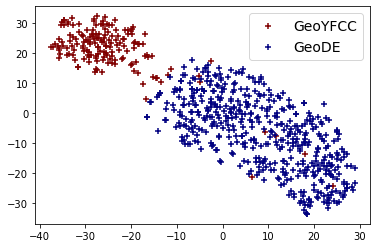

In [44]:
import matplotlib.pyplot as plt

num_appen = len(appen_af['Plate of food Image'])
plt.scatter(trans_food[num_appen:, 0], trans_food[num_appen:, 1], color='maroon', marker='+', label='GeoYFCC')
plt.scatter(trans_food[:num_appen, 0], trans_food[:num_appen, 1], color='navy', marker='+', label='GeoDE')

plt.legend(fontsize=14)
plt.savefig('africa_plate_of_food.pdf', bbox_inches='tight')

479